In [ ]:
!pip install scikeo rasterio dbfread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 454 kB/s 
     |████████████████████████████████| 16.7 MB 44.1 MB/s 
  Created wheel for scikeo: filename=scikeo-0.1.9-py2.py3-none-any.whl size=33133 sha256=132bdb1201a88eb91cae11ebf0ab02864809d173b8b6b117f63129b4c52fb98a
  Stored in directory: /root/.cache/pip/wheels/11/e9/f5/9e154aa8d4bf67ebad85bd6ecbb7d0b435f4ade574c3d9d63c
Successfully built scikeo


In [ ]:
import rasterio
import numpy as np
from scikeo.mla import MLA
from scikeo.plot import plotRGB
import matplotlib.pyplot as plt
from dbfread import DBF
import matplotlib as mpl
import pandas as pd

In [ ]:
??MLA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_raster = r"/content/drive/MyDrive/Analisis_trabajo final/stack/stack.tif"
img = rasterio.open(path_raster)

path_endm = r"/content/drive/MyDrive/Analisis_trabajo final/Newpoints/points.dbf"
endm = DBF(path_endm)

In [ ]:
# img = img.meta

In [ ]:
# img.update({'dtype': 'int64'})

In [ ]:
# endmembers
df = pd.DataFrame(iter(endm))
df.head()

,id,b1_stack,b2_stack,b3_stack,b4_stack,b5_stack,b6_stack,b7_stack,b8_stack
0,1,0.029289,-0.064551,2432.0,2594.0,2784.0,2952.0,3270.0,2990.0
1,1,-0.000520,-0.065656,2514.0,2526.0,2884.0,2881.0,3377.0,3236.0
2,1,0.031816,-0.095255,2504.0,2612.0,2967.0,3162.0,3551.0,3226.0
3,1,0.039911,-0.071278,2414.0,2417.0,2574.0,2788.0,3512.0,3272.0
4,1,0.020826,-0.053380,2675.0,2731.0,2915.0,3039.0,3670.0,3515.0


In [ ]:
len(df)

432

In [ ]:
inst = MLA(image = img, endmembers = endm)

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

RF_class = inst.RF(training_split = 0.7)

## Resultados del modelo de Random Forest



In [ ]:
RF_class.keys()

dict_keys(['Overall_Accuracy', 'Kappa_Index', 'Confusion_Matrix', 'Classification_Map', 'Image'])

In [ ]:
RF_class.get('Overall_Accuracy')

0.8692307692307693

In [ ]:
RF_class.get('Kappa_Index')

0.8465597444976741

In [ ]:
RF_class.get('Confusion_Matrix')

,0,1,2,3,4,5,6,Total,Users_Accuracy,Commission
0,12.0,1.000000,3.0,1.000000,1.000000,0.000000,0.0,18.0,66.666667,33.333333
1,0.0,16.000000,0.0,0.000000,0.000000,0.000000,0.0,16.0,100.000000,0.000000
2,2.0,0.000000,17.0,2.000000,1.000000,0.000000,0.0,22.0,77.272727,22.727273
3,2.0,0.000000,0.0,19.000000,0.000000,0.000000,0.0,21.0,90.476190,9.523810
4,0.0,0.000000,0.0,1.000000,11.000000,1.000000,0.0,13.0,84.615385,15.384615
5,0.0,0.000000,0.0,0.000000,1.000000,23.000000,0.0,24.0,95.833333,4.166667
6,0.0,1.000000,0.0,0.000000,0.000000,0.000000,15.0,16.0,93.750000,6.250000
Total,16.0,18.000000,20.0,23.000000,14.000000,24.000000,15.0,NaN,NaN,NaN
Producer_Accuracy,75.0,88.888889,85.0,82.608696,78.571429,95.833333,100.0,NaN,NaN,NaN
Omission,25.0,11.111111,15.0,17.391304,21.428571,4.166667,0.0,NaN,NaN,NaN


## Graficamos el modelo de random forest

In [ ]:
# convert to array
arr_img = img.read()

# stacking the image
rgb = np.stack([arr_img[4,:,:], arr_img[3,:,:], arr_img[2,:,:]], axis = -1)

# Let's define the color palette
palette = mpl.colors.ListedColormap(["#2232F9","#F922AE","#229954","#7CED5E"])

In [ ]:
RF_class.get('Classification_Map').dtype

dtype('int64')

In [ ]:
arreglo = RF_class.get('Classification_Map')

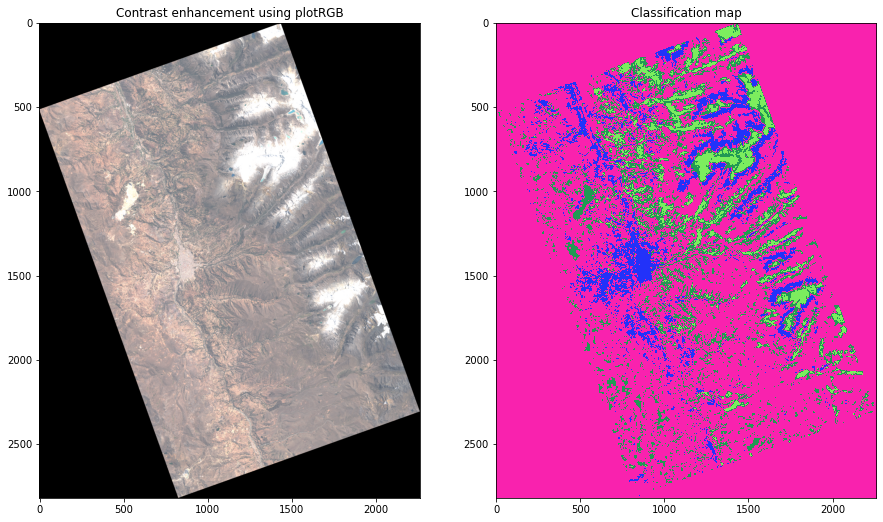

In [ ]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))

# satellite image
plotRGB(img, title = 'Contrast enhancement using plotRGB', ax = axes[0])

# class results
axes[1].imshow(RF_class.get('Classification_Map'), cmap = palette)
axes[1].set_title("Classification map")
axes[1].grid(False)

In [ ]:
!pip install git+https://github.com/ytarazona/scikit-eo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ytarazona/scikit-eo to /tmp/pip-req-build-fu44loan
  Running command git clone -q https://github.com/ytarazona/scikit-eo /tmp/pip-req-build-fu44loan
  Created wheel for scikeo: filename=scikeo-0.1.91-py2.py3-none-any.whl size=33431 sha256=4e186775d5594400cbf9b89305aababf97435ba99fd15d939a1e167bf370c7a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-98s6yhe9/wheels/7b/c5/9c/e2991aac13332198df33b6127d900ec722f1daac187fe9bbae
Successfully built scikeo
  Attempting uninstall: scikeo
    Found existing installation: scikeo 0.1.9
    Uninstalling scikeo-0.1.9:
      Successfully uninstalled scikeo-0.1.9


In [ ]:
from scikeo.writeRaster import writeRaster

In [ ]:
# guardando nuestros indices
writeRaster(arr = arreglo, 
   image = img, 
   filename = 'raster', 
   filepath = '/content/drive/MyDrive/Analisis_trabajo final',
   n = 1)



---



## Modelo con Redes Neuronales

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

NN_class = inst.NN(training_split = 0.7)

In [ ]:
NN_class.get('Overall_Accuracy')

0.7615384615384615

In [ ]:
NN_class.get('Kappa_Index')

0.7213579478669709

In [ ]:
NN_class.get('Confusion_Matrix')

,0,1,2,3,4,5,6,Total,Users_Accuracy,Commission
0,12.0,0.0,1.000000,2.0,1.0,1.000000,0.000000,17.0,70.588235,29.411765
1,1.0,19.0,3.000000,2.0,0.0,0.000000,3.000000,28.0,67.857143,32.142857
2,0.0,0.0,11.000000,0.0,2.0,0.000000,4.000000,17.0,64.705882,35.294118
3,2.0,0.0,1.000000,12.0,0.0,0.000000,0.000000,15.0,80.000000,20.000000
4,1.0,0.0,5.000000,0.0,12.0,0.000000,0.000000,18.0,66.666667,33.333333
5,0.0,0.0,0.000000,0.0,0.0,17.000000,0.000000,17.0,100.000000,0.000000
6,0.0,1.0,0.000000,0.0,1.0,0.000000,16.000000,18.0,88.888889,11.111111
Total,16.0,20.0,21.000000,16.0,16.0,18.000000,23.000000,NaN,NaN,NaN
Producer_Accuracy,75.0,95.0,52.380952,75.0,75.0,94.444444,69.565217,NaN,NaN,NaN
Omission,25.0,5.0,47.619048,25.0,25.0,5.555556,30.434783,NaN,NaN,NaN


## Graficamos el modelo con Redes Neuronales

In [ ]:
# convert to array
arr_img = img.read()

# stacking the image
rgb = np.stack([arr_img[4,:,:], arr_img[3,:,:], arr_img[2,:,:]], axis = -1)

# Let's define the color palette
palette = mpl.colors.ListedColormap(["#2232F9","#F922AE","#229954","#7CED5E"])

In [ ]:
arreglo1 = NN_class.get('Classification_Map')

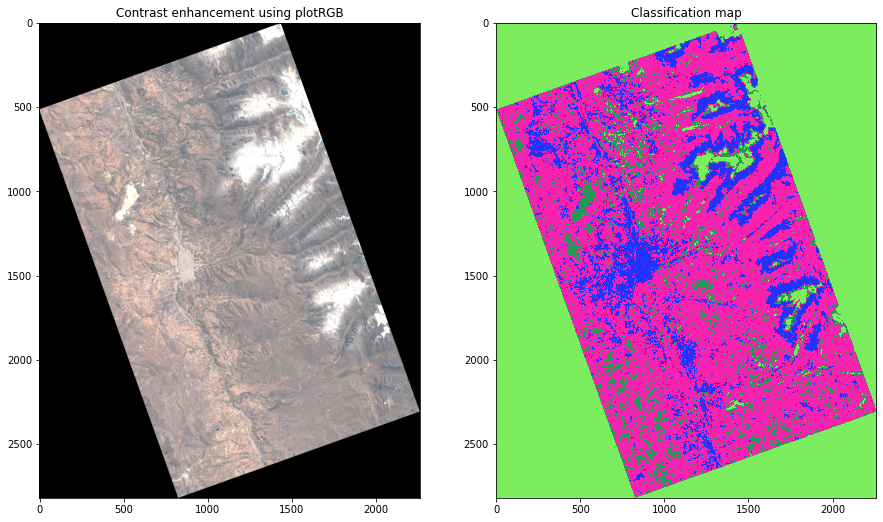

In [ ]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))

# satellite image
plotRGB(img, title = 'Contrast enhancement using plotRGB', ax = axes[0])

# class results
axes[1].imshow(arreglo1, cmap = palette)
axes[1].set_title("Classification map")
axes[1].grid(False)

In [ ]:
# guardando nuestros indices
writeRaster(arr = arreglo1, 
   image = img, 
   filename = 'redes_neuronales', 
   filepath = '/content/drive/MyDrive/Analisis_trabajo final',
   n = 1)

## Modelo con Support Vector Machine

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

SVM_class = inst.SVM(training_split = 0.7)

In [ ]:
SVM_class.get('Overall_Accuracy')

0.8538461538461538

In [ ]:
SVM_class.get('Kappa_Index')

0.829584655719608

In [ ]:
SVM_class.get('Confusion_Matrix')

,0,1,2,3,4,5,6,Total,Users_Accuracy,Commission
0,13.000000,2.000000,0.00,1.0,5.0,1.000000,0.000000,22.0,59.090909,40.909091
1,2.000000,16.000000,0.00,1.0,0.0,0.000000,0.000000,19.0,84.210526,15.789474
2,0.000000,0.000000,15.00,2.0,1.0,0.000000,1.000000,19.0,78.947368,21.052632
3,1.000000,0.000000,0.00,16.0,0.0,0.000000,0.000000,17.0,94.117647,5.882353
4,1.000000,0.000000,1.00,0.0,14.0,0.000000,0.000000,16.0,87.500000,12.500000
5,0.000000,0.000000,0.00,0.0,0.0,20.000000,0.000000,20.0,100.000000,0.000000
6,0.000000,0.000000,0.00,0.0,0.0,0.000000,17.000000,17.0,100.000000,0.000000
Total,17.000000,18.000000,16.00,20.0,20.0,21.000000,18.000000,NaN,NaN,NaN
Producer_Accuracy,76.470588,88.888889,93.75,80.0,70.0,95.238095,94.444444,NaN,NaN,NaN
Omission,23.529412,11.111111,6.25,20.0,30.0,4.761905,5.555556,NaN,NaN,NaN


## Graficamos el modelo con Support Vector Machine

In [ ]:
# convert to array
arr_img = img.read()

# stacking the image
rgb = np.stack([arr_img[4,:,:], arr_img[3,:,:], arr_img[2,:,:]], axis = -1)

# Let's define the color palette
palette = mpl.colors.ListedColormap(["#2232F9","#F922AE","#229954","#7CED5E"])

In [ ]:
arreglo2 = SVM_class.get('Classification_Map')

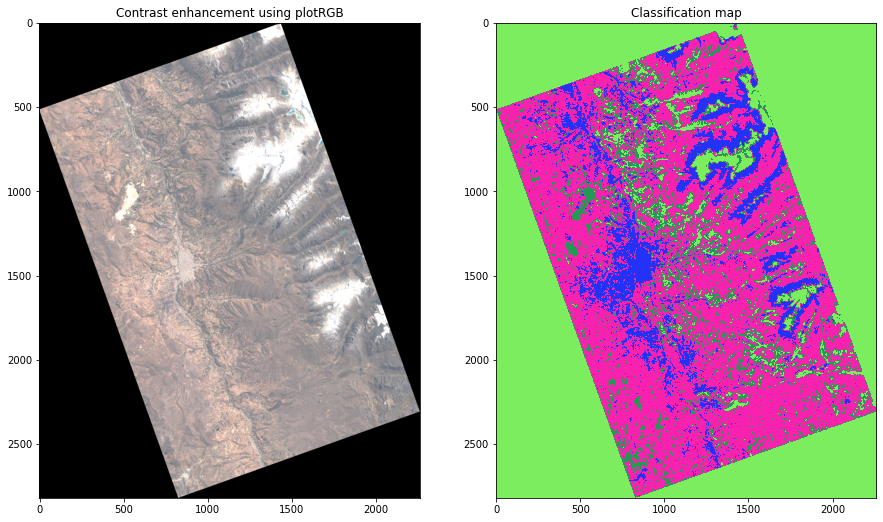

In [ ]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))

# satellite image
plotRGB(img, title = 'Contrast enhancement using plotRGB', ax = axes[0])

# class results
axes[1].imshow(arreglo2, cmap = palette)
axes[1].set_title("Classification map")
axes[1].grid(False)

In [ ]:
# guardando nuestros indices
writeRaster(arr = arreglo2, 
   image = img, 
   filename = 'SVM', 
   filepath = '/content/drive/MyDrive/Analisis_trabajo final',
   n = 1)